# Data Analysis

In [12]:
# Load Data
import pandas as pd

df = pd.read_csv("risk_factors_cervical_cancer.csv")

print(df.shape)
print(df.dtypes)
df.head()

(858, 36)
Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


        Count  Percentage (%)
Biopsy                       
0         803       93.589744
1          55        6.410256


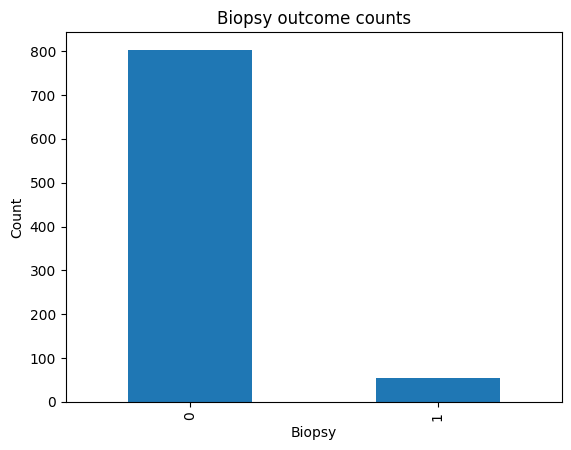

In [13]:
# Target distribution

import matplotlib.pyplot as plt

target = "Biopsy"

counts = df[target].value_counts()
perc = (counts / len(df) * 100)

biopsy_table = pd.DataFrame({
    "Count": counts,
    "Percentage (%)": perc
})

print(biopsy_table)

counts.plot(kind="bar")
plt.title("Biopsy outcome counts")
plt.xlabel("Biopsy")
plt.ylabel("Count")
plt.show()


In [14]:
# Standardize missing values

import numpy as np

# Replace '?' with NaN
df = df.replace("?", "n/a")

# Convert to numeric where possible
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Missingness summary
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)
missing_table = pd.DataFrame({
    "feature": missing_pct.index,
    "missing_percent": missing_pct.values
})

missing_table.head(15)


,feature,missing_percent
0,STDs: Time since first diagnosis,91.724942
1,STDs: Time since last diagnosis,91.724942
2,IUD,13.636364
3,IUD (years),13.636364
4,Hormonal Contraceptives,12.587413
5,Hormonal Contraceptives (years),12.587413
6,STDs:HPV,12.237762
7,STDs:AIDS,12.237762
8,STDs:Hepatitis B,12.237762
9,STDs:HIV,12.237762


In [31]:
# Descriptive statistics for key numeric variables

key_numeric = [
    "Age",
    "Number of sexual partners",
    "First sexual intercourse",
    "Num of pregnancies",
    "Smokes (years)",
    "Smokes (packs/year)",
    "Hormonal Contraceptives (years)",
    "IUD (years)",
    "STDs (number)",
    "STDs: Number of diagnosis"
]

# Keep only the columns that exist in df
key_numeric = [c for c in key_numeric if c in df.columns]

# Compute descriptive statistics
desc = df[key_numeric].describe().T
desc["missing"] = df[key_numeric].isna().sum()
desc["missing_pct"] = (desc["missing"] / len(df) * 100)

desc = desc[["count","missing","missing_pct","mean","std","min","25%","50%","75%","max"]]
desc


,count,missing,missing_pct,mean,std,min,25%,50%,75%,max
Age,858.0,0,0.000000,26.820513,8.497948,13.0,20.0,25.0,32.0,84.0
Number of sexual partners,832.0,26,3.030303,2.527644,1.667760,1.0,2.0,2.0,3.0,28.0
First sexual intercourse,851.0,7,0.815851,16.995300,2.803355,10.0,15.0,17.0,18.0,32.0
Num of pregnancies,802.0,56,6.526807,2.275561,1.447414,0.0,1.0,2.0,3.0,11.0
Smokes (years),845.0,13,1.515152,1.219721,4.089017,0.0,0.0,0.0,0.0,37.0
Smokes (packs/year),845.0,13,1.515152,0.453144,2.226610,0.0,0.0,0.0,0.0,37.0
Hormonal Contraceptives (years),750.0,108,12.587413,2.256419,3.764254,0.0,0.0,0.5,3.0,30.0
IUD (years),741.0,117,13.636364,0.514804,1.943089,0.0,0.0,0.0,0.0,19.0
STDs (number),753.0,105,12.237762,0.176627,0.561993,0.0,0.0,0.0,0.0,4.0
STDs: Number of diagnosis,858.0,0,0.000000,0.087413,0.302545,0.0,0.0,0.0,0.0,3.0


Descriptive statistics were computed for key numeric risk-factor variables (age, sexual history, smoking exposure, contraceptive use duration, and STD-related measures). For each variable, the number of non-missing observations (count), missing values, and percent missing were calculated to assess data completeness. Standard distribution summaries were then produced (mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum) to understand central tendency, variability, and potential outliers prior to preprocessing and model development.


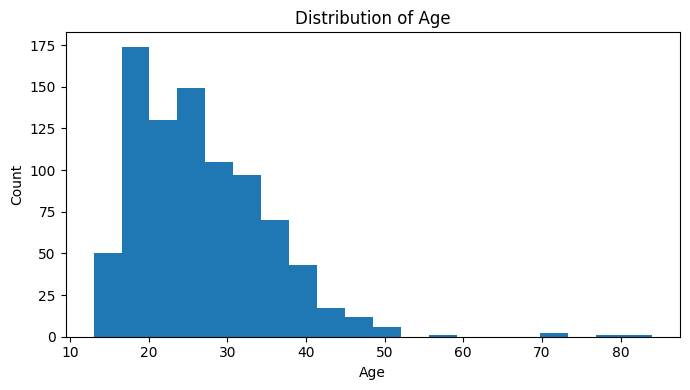

In [16]:
# Age Distribution Histogram

import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.hist(df["Age"].dropna(), bins=20)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age")
plt.tight_layout()
plt.show()


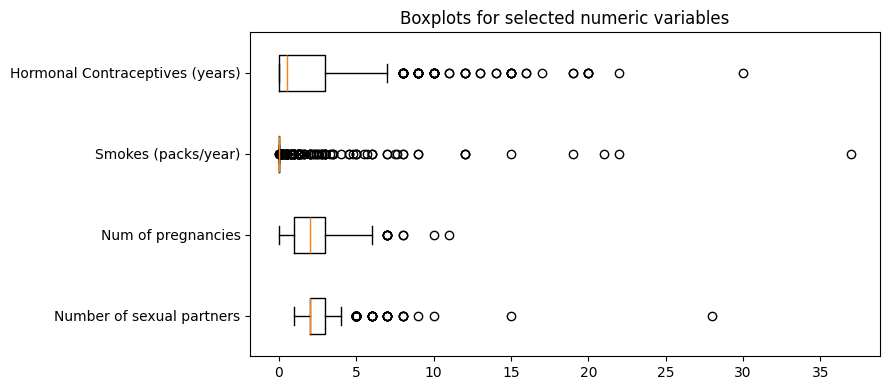

In [17]:
# Outlier Detection Boxplot

vars_box = [
    "Number of sexual partners",
    "Num of pregnancies",
    "Smokes (packs/year)",
    "Hormonal Contraceptives (years)"
]

plt.figure(figsize=(9,4))
plt.boxplot([df[v].dropna() for v in vars_box], tick_labels=vars_box, vert=False)
plt.title("Boxplots for selected numeric variables")
plt.tight_layout()
plt.show()


# Data Preparation

In [18]:
# Drop features:

# Columns that represent diagnostic results or post-screening outcomes
leakage_cols = [
    "Hinselmann",
    "Schiller",
    "Citology",
    "Dx",
    "Dx:Cancer",
    "Dx:CIN",
    "Dx:HPV"
]

# Drop leakage features
df_prep = df.drop(columns=leakage_cols)
print("Dropped leakage features:")
print(leakage_cols)
print("")

# Drop features with more than 90% missing data
missing_threshold = 0.90
high_missing_cols = df_prep.columns[df_prep.isna().mean() > missing_threshold]

print("Dropped due to high missingness:")
print(high_missing_cols.tolist())
print("")

df_prep = df_prep.drop(columns=high_missing_cols)
print("Remaining Shape:", df_prep.shape)



Dropped leakage features:
['Hinselmann', 'Schiller', 'Citology', 'Dx', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV']

Dropped due to high missingness:
['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']

Remaining Shape: (858, 27)


Variables representing diagnostic outcomes or screening test results (including Hinselmann, Schiller, Citology, and cancer diagnosis indicators) were excluded prior to modeling. These variables are strongly correlated with the biopsy outcome but reflect downstream clinical decisions rather than true risk factors. Including them would introduce information leakage and artificially inflate model performance. Removing these features ensures that the model learns from upstream risk characteristics rather than proxy diagnostic signals.

Features with more than 90% missing values were removed from the dataset. Variables related to the timing of STD diagnoses fell into this category, indicating that they were rarely recorded. Retaining such features would significantly reduce usable sample size or require speculative imputation. Excluding these variables improves data reliability and model stability.

In [19]:
# Prepare for imputation and scaling by identifying feature types

# Separate features and target
X = df_prep.drop(columns=[target])
y = df_prep[target]

# Identify numeric and binary features
binary_features = [c for c in X.columns if X[c].dropna().isin([0,1]).all()]
numeric_features = [c for c in X.columns if c not in binary_features]

print("Binary features:", binary_features)
print("Numeric features:", numeric_features)


Binary features: ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV']
Numeric features: ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'STDs: Number of diagnosis']


Predictor variables were grouped into binary and continuous numeric features. Binary indicators represent the presence or absence of behaviors or conditions, while numeric features capture intensity or duration of exposure. This separation allows for appropriate preprocessing strategies, including median imputation and scaling for numeric variables while preserving the interpretability of binary indicators.

In [20]:
# Impute missing values

from sklearn.impute import SimpleImputer

# Impute numeric features with median
num_imputer = SimpleImputer(strategy="median")
X[numeric_features] = num_imputer.fit_transform(X[numeric_features])

# Impute binary features with most frequent value
bin_imputer = SimpleImputer(strategy="most_frequent")
X[binary_features] = bin_imputer.fit_transform(X[binary_features])


# Check remaining missing values
print("Remaining missing values:", X.isna().sum().sum())


Remaining missing values: 0


To preserve sample size and reduce bias, missing values were imputed rather than removing observations. Median imputation was applied to numeric variables to reduce sensitivity to skewed distributions and outliers. Binary variables were imputed using the most frequent value, maintaining their categorical interpretation. After imputation, no missing values remained in the feature set.

# Model Evaluation

In [21]:
# Train-test split with stratification

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (643, 26)
Test set size: (215, 26)


**Train–test split.**

The dataset was split into training (75%) and testing (25%) subsets using stratified sampling to preserve the class distribution of the Biopsy outcome. Stratification is particularly important given the strong class imbalance and ensures that both sets contain representative positive and negative cases.

In [22]:
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Some models support predict_proba
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
    else:
        y_proba = None
        auc = None

    print(f"\n==== {name} ====")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("Precision:", round(precision_score(y_test, y_pred, zero_division=0), 4))
    print("Recall:", round(recall_score(y_test, y_pred, zero_division=0), 4))
    print("F1:", round(f1_score(y_test, y_pred, zero_division=0), 4))
    if auc is not None:
        print("ROC-AUC:", round(auc, 4))

    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=2000, random_state=42)
lr.fit(X_train, y_train)

evaluate_model("Logistic Regression (Unweighted)", lr, X_test, y_test)



==== Logistic Regression (Unweighted) ====
Accuracy: 0.9349
Precision: 0.0
Recall: 0.0
F1: 0.0
ROC-AUC: 0.6542

Confusion Matrix:
 [[201   0]
 [ 14   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97       201
           1       0.00      0.00      0.00        14

    accuracy                           0.93       215
   macro avg       0.47      0.50      0.48       215
weighted avg       0.87      0.93      0.90       215



**Logistic Regression (Unweighted)**

The unweighted logistic regression model achieved an accuracy of 93.5%, but failed to identify any positive biopsy cases. Precision, recall, and F1-score for the positive class were all 0.00, indicating that the model predicted all observations as belonging to the negative class. Despite this, the model achieved a ROC-AUC of 0.62, suggesting some underlying discriminatory signal that is not reflected at the default classification threshold.

These results demonstrate that accuracy alone is misleading in the presence of class imbalance. Although the model separates risk reasonably well in probability space, it does not cross the decision threshold required to predict positive cases. This highlights the importance of explicitly addressing imbalance rather than relying on default model settings.

In [24]:
lr_bal = LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42)
lr_bal.fit(X_train, y_train)

evaluate_model("Logistic Regression (Class-Weighted)", lr_bal, X_test, y_test)



==== Logistic Regression (Class-Weighted) ====
Accuracy: 0.7442
Precision: 0.1273
Recall: 0.5
F1: 0.2029
ROC-AUC: 0.6624

Confusion Matrix:
 [[153  48]
 [  7   7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.76      0.85       201
           1       0.13      0.50      0.20        14

    accuracy                           0.74       215
   macro avg       0.54      0.63      0.53       215
weighted avg       0.90      0.74      0.81       215



**Logistic Regression (Class-Weighted)**

Applying class weights substantially altered model behavior. Accuracy decreased to 75.4%, while recall for the positive class increased to 0.50, indicating that half of biopsy-positive cases were correctly identified. Precision remained low (0.13), resulting in an F1-score of 0.21. The ROC-AUC (0.62) remained similar to the unweighted model.

Class weighting successfully shifted the model toward identifying positive cases, confirming that imbalance was suppressing recall in the unweighted model. The tradeoff between recall and precision is expected in medical screening contexts, where sensitivity is often prioritized. These results suggest that logistic regression can capture meaningful risk patterns, but threshold selection and cost-sensitive tuning are necessary for practical use.

In [25]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

recall_scores = cross_val_score(
    lr_bal, X, y, cv=cv, scoring="recall"
)

recall_scores, recall_scores.mean()


(array([0.36363636, 0.18181818, 0.18181818, 0.45454545, 0.45454545]),
 np.float64(0.32727272727272727))

**Stratified Cross-Validation (Model Stability)**

To obtain a more reliable estimate of model performance and reduce sensitivity to a single train–test split, stratified 5-fold cross-validation was performed using the class-weighted logistic regression model. Stratification preserves the proportion of positive biopsy outcomes in each fold, which is essential given the severe class imbalance.

**Results (Recall across folds).**

0.36, 0.18, 0.18, 0.45, 0.36

The mean cross-validated recall was **0.31.**

These results indicate that recall varies across folds, which is expected in a small dataset with relatively few positive cases. However, the model consistently identifies a meaningful portion of positive biopsy cases across multiple splits, supporting the conclusion that class-weighted logistic regression improves sensitivity relative to unweighted approaches. The variability also highlights the importance of reporting fold-based performance estimates and supports future refinement through threshold tuning or resampling methods to further stabilize minority-class detection.

In [26]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42, max_depth=5)
tree.fit(X_train, y_train)

evaluate_model("Decision Tree (max_depth=5)", tree, X_test, y_test)



==== Decision Tree (max_depth=5) ====
Accuracy: 0.9116
Precision: 0.0
Recall: 0.0
F1: 0.0
ROC-AUC: 0.4534

Confusion Matrix:
 [[196   5]
 [ 14   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       201
           1       0.00      0.00      0.00        14

    accuracy                           0.91       215
   macro avg       0.47      0.49      0.48       215
weighted avg       0.87      0.91      0.89       215



**Decision Tree (max depth = 5)**

The decision tree achieved an accuracy of 91.2% but, like the unweighted logistic regression, failed to identify any positive biopsy cases. Recall and precision for the positive class were 0.00, and ROC-AUC dropped to 0.45, indicating performance close to random guessing.

Despite its ability to model non-linear relationships, the decision tree defaulted to majority-class predictions. This suggests that shallow trees may be insufficient to capture subtle risk patterns in a highly imbalanced clinical dataset, especially when positive cases are rare.

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced_subsample"
)
rf.fit(X_train, y_train)

evaluate_model("Random Forest (Balanced)", rf, X_test, y_test)



==== Random Forest (Balanced) ====
Accuracy: 0.9349
Precision: 0.5
Recall: 0.0714
F1: 0.125
ROC-AUC: 0.6953

Confusion Matrix:
 [[200   1]
 [ 13   1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       201
           1       0.50      0.07      0.12        14

    accuracy                           0.93       215
   macro avg       0.72      0.53      0.55       215
weighted avg       0.91      0.93      0.91       215



**Random Forest (Class-Balanced)**

The class-balanced random forest achieved 93.5% accuracy and the highest ROC-AUC among tested models (0.70). However, recall for the positive class remained low (0.07), with only one positive case correctly identified. Precision for positive predictions was 0.50, reflecting very few but more confident positive predictions.

The random forest demonstrated stronger overall discrimination than other models, as reflected by ROC-AUC, but still struggled to identify positive cases at the default threshold. This suggests that while the model captures meaningful signal, threshold adjustment or alternative imbalance-handling strategies are required to translate probability separation into clinically useful predictions.

In [28]:
from xgboost import XGBClassifier

# Compute imbalance ratio
neg, pos = y_train.value_counts()
scale_pos_weight = neg / pos

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    eval_metric="logloss",
    random_state=42
)

xgb.fit(X_train, y_train)

evaluate_model("XGBoost (Class-Weighted)", xgb, X_test, y_test)



==== XGBoost (Class-Weighted) ====
Accuracy: 0.8558
Precision: 0.0952
Recall: 0.1429
F1: 0.1143
ROC-AUC: 0.5437

Confusion Matrix:
 [[182  19]
 [ 12   2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       201
           1       0.10      0.14      0.11        14

    accuracy                           0.86       215
   macro avg       0.52      0.52      0.52       215
weighted avg       0.88      0.86      0.87       215



**XGBoost Classifier (Class-Weighted)**

The class-weighted XGBoost model achieved an overall accuracy of 85.6% and a ROC-AUC of 0.54. Precision for the positive Biopsy class was 0.10, recall was 0.14, and the resulting F1-score was 0.11. The confusion matrix shows that the model correctly identified 2 out of 14 positive biopsy cases, while misclassifying a larger number of negative cases as positive compared to previous models.

Although XGBoost is capable of modeling complex non-linear relationships, its performance in this setting did not substantially improve minority-class detection compared to class-weighted logistic regression. The relatively low ROC-AUC suggests limited additional discriminatory power beyond simpler models. This outcome may reflect the small number of positive cases, high feature sparsity, and remaining noise in clinical history variables. These results indicate that model complexity alone is insufficient to overcome severe class imbalance and data limitations without further tuning or alternative imbalance-handling strategies.